In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import activations
from tensorflow.keras import callbacks
from tensorflow.keras import Input
from tensorflow.keras import utils
from tensorflow.keras import backend as K
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
print('TensorFlow版本: {0}'.format(tf.__version__))


E:\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
E:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"

Bad key "text.kerning_factor" on line 4 in
E:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


TensorFlow版本: 2.8.0


In [4]:
train_data = pd.read_csv('./data/TrainingSet.csv')
train_label = train_data['QuantitySold']
train_data = train_data.drop(columns=['QuantitySold'])
test_data = pd.read_csv('./data/TestSet.csv')
test_label = test_data['QuantitySold']
test_data = test_data.drop(columns=['QuantitySold'])

In [5]:

from sklearn.linear_model import LogisticRegression as LR
drop_cols = ['EbayID', 'SellerName', 'Category', 'EndDay']
test_data = test_data.drop(columns=drop_cols)
train_data = train_data.drop(columns=drop_cols)
x1= train_data
y1= train_label
lr = LR()
lr.fit(x1,y1)
print(lr.score(x1, y1))
x2= test_data
y2= test_label
lr.predict(x2)
print(lr.score(x2,y2))

0.8583460949464012
0.8722103577148959


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
data = pd.read_csv('./data/TrainingSet.csv')
print(data.shape)
labels = data['QuantitySold']
columns = data.columns
print('特征个数: {0}'.format(len(columns)))
print(columns)
print('\n统计是否有缺失值')
for c in columns:
    print('{0}: {1}'.format(c, data[c].isnull().sum()))
embed_cols = ['EbayID', 'SellerName', 'Category', 'EndDay',]

(258588, 28)
特征个数: 26
Index(['EbayID', 'Price', 'PricePercent', 'StartingBidPercent', 'SellerName',
       'SellerClosePercent', 'Category', 'PersonID', 'StartingBid', 'AvgPrice',
       'EndDay', 'HitCount', 'AuctionAvgHitCount', 'ItemAuctionSellPercent',
       'SellerSaleAvgPriceRatio', 'SellerAvg', 'SellerItemAvg',
       'AuctionHitCountAvgRatio', 'BestOffer', 'IsHOF', 'ItemListedCount',
       'AuctionCount', 'AuctionSaleCount', 'SellerAuctionCount',
       'SellerAuctionSaleCount', 'AuctionMedianPrice'],
      dtype='object')

统计是否有缺失值
EbayID: 0
Price: 0
PricePercent: 0
StartingBidPercent: 0
SellerName: 0
SellerClosePercent: 0
Category: 0
PersonID: 0
StartingBid: 0
AvgPrice: 0
EndDay: 0
HitCount: 0
AuctionAvgHitCount: 0
ItemAuctionSellPercent: 0
SellerSaleAvgPriceRatio: 0
SellerAvg: 0
SellerItemAvg: 0
AuctionHitCountAvgRatio: 0
BestOffer: 0
IsHOF: 0
ItemListedCount: 0
AuctionCount: 0
AuctionSaleCount: 0
SellerAuctionCount: 0
SellerAuctionSaleCount: 0
AuctionMedianPrice: 0


In [3]:
seller_name = data[embed_cols[1]].values
end_day = data[embed_cols[3]].values
ebay_id = data[embed_cols[0]].values
category = data[embed_cols[2]].values

ei_emb = layers.experimental.preprocessing.IntegerLookup()
ei_emb.adapt(ebay_id)
ei_num = len(ei_emb.get_vocabulary())
print('EbayID个数: {0}'.format(ei_num))
cate_emb = layers.experimental.preprocessing.IntegerLookup()
cate_emb.adapt(category)
cate_num = len(cate_emb.get_vocabulary())
print('Category个数: {0}'.format(cate_num))
ed_emb = layers.experimental.preprocessing.StringLookup()
ed_emb.adapt(end_day)
ed_num = len(ed_emb.get_vocabulary())
print('EndDay个数: {0}'.format(ed_num))
sn_emb = layers.experimental.preprocessing.StringLookup()
sn_emb.adapt(seller_name)
sn_num = len(sn_emb.get_vocabulary())
print('SellerName个数: {0}'.format(sn_num))

EbayID个数: 258589
Category个数: 46
EndDay个数: 8
SellerName个数: 11067


In [4]:
data = data.drop(columns=embed_cols).values
print(data.shape)
print('数值特征归一化:')
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
print(data)

(258588, 22)
数值特征归一化:
[[9.08060537e-02 8.21956643e-04 2.98499166e-05 ... 1.84181262e-03
  5.78922495e-03 5.09834605e-03]
 [1.43309554e-01 8.01667593e-04 1.86214564e-04 ... 3.64887406e-03
  1.22873346e-02 1.01717206e-02]
 [3.66357757e-02 3.31795442e-04 3.01612007e-04 ... 8.44453711e-03
  1.20510397e-02 5.09834605e-03]
 ...
 [1.32675512e-02 1.44958310e-03 1.44958310e-03 ... 2.64108980e-03
  2.83553875e-03 4.07867684e-04]
 [9.99399960e-02 1.37354086e-04 1.37354086e-04 ... 1.71323325e-02
  6.85255198e-03 2.01811265e-02]
 [4.16361091e-02 2.05947749e-04 4.92495831e-05 ... 5.97720322e-03
  1.90217391e-02 8.33007317e-03]]


In [5]:
test_data = pd.read_csv('./data/TestSet.csv')
print('测试数据: ', test_data.shape)
test_labels = test_data['QuantitySold']
test_data = test_data.drop(columns=['ReturnsAccepted', 'QuantitySold'])
test_cate = test_data[embed_cols[2]].values
test_ed = test_data[embed_cols[3]].values
test_sn = test_data[embed_cols[1]].values
test_data = test_data.drop(columns=embed_cols).values
test_data = scaler.transform(test_data)

测试数据:  (37460, 28)


In [6]:
class Squeeze(layers.Layer):
    def __init__(self, **kwargs):
        super(Squeeze, self).__init__(**kwargs)
    def call(self, inputs, *args, **kwargs):
        return K.squeeze(inputs, axis=1)

In [7]:
def build_model(cate_emb, ed_emb, sn_emb):
    cate_input = Input(shape=(1,), dtype='float32', name='cate_input')
    ed_input = Input(shape=(1,), dtype='string', name='endday_input')
    sn_input = Input(shape=(1,), dtype='string', name='sellername_input')

    cate_emb = cate_emb(cate_input)
    ed_emb = ed_emb(ed_input)
    sn_emb = sn_emb(sn_input)

    cate_emb = layers.Embedding(cate_num, 8)(cate_emb)
    ed_emb = layers.Embedding(ed_num, 4)(ed_emb)
    sn_emb = layers.Embedding(sn_num, 16)(sn_emb)

    squeeze_layer = Squeeze()
    cate_emb = squeeze_layer(cate_emb)
    ed_emb = squeeze_layer(ed_emb)
    sn_emb = squeeze_layer(sn_emb)

    ox_input = layers.Input(shape=(data.shape[-1],), dtype='float32', name='otherfea_input')
    x = layers.Concatenate()([ox_input, cate_emb, ed_emb, sn_emb])
    x = layers.Dense(128, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activations.swish)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activations.swish)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(32, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activations.swish)(x)
    x = layers.Dropout(0.2)(x)
    output = layers.Dense(1, activation=activations.sigmoid)(x)

    model = models.Model(inputs=[cate_input, ed_input, sn_input, ox_input], outputs=[output])
    model.compile(loss=losses.BinaryCrossentropy(),
                  optimizer=optimizers.Adam(),
                  metrics=[metrics.BinaryAccuracy()])
    return model


In [8]:
def make_dataset(cate, ed, sn, ox, label):
    ds = tf.data.Dataset.from_tensor_slices(((cate, ed, sn, ox), label))
    ds = ds.shuffle(1024, reshuffle_each_iteration=True)
    ds = ds.batch(512).cache().prefetch(tf.data.AUTOTUNE)
    return ds

In [9]:
callback = [callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=4, restore_best_weights=True),
            callbacks.ReduceLROnPlateau(monitor='val_binary_accuracy', patience=2, factor=0.65)]

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cate_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 endday_input (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 sellername_input (InputLayer)  [(None, 1)]          0           []                               
                                                                                                  
 integer_lookup_1 (IntegerLooku  (None, 1)           0           ['cate_input[0][0]']             
 p)                                                                                           

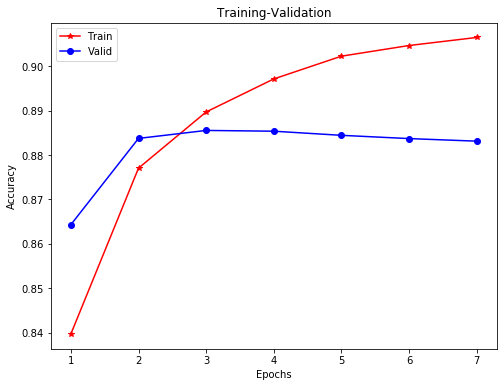

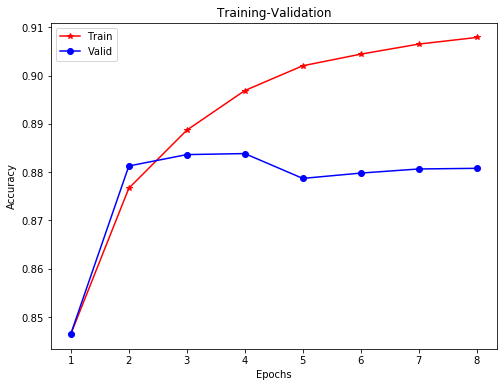

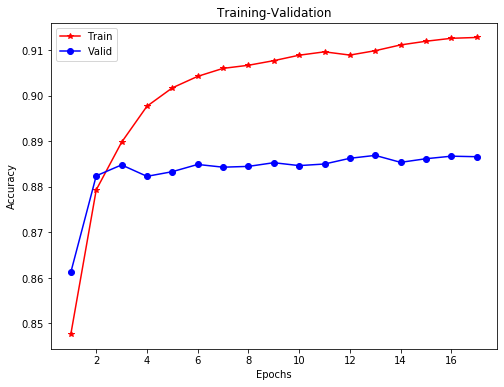

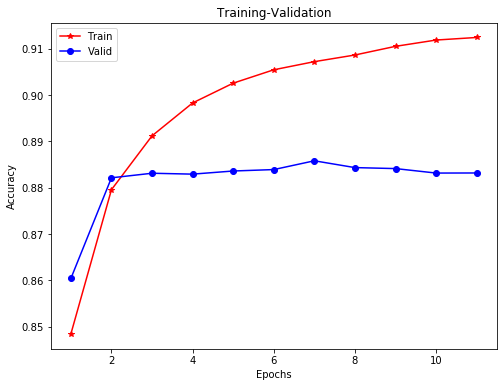

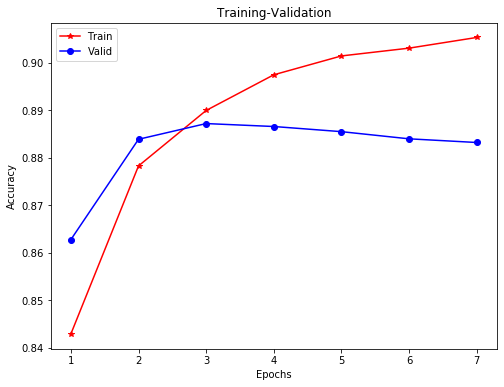

In [10]:
all_pred = []
kfold = KFold(n_splits=5, random_state=43, shuffle=True)
for k, (train_ind, valid_ind) in enumerate(kfold.split(data, labels)):
    train_cate = category[train_ind]
    train_ed = end_day[train_ind]
    train_sn = seller_name[train_ind]
    train_ox = data[train_ind]
    train_labels = labels[train_ind]

    valid_cate = category[valid_ind]
    valid_ed = end_day[valid_ind]
    valid_sn = seller_name[valid_ind]
    valid_ox = data[valid_ind]
    valid_labels = labels[valid_ind]

    train_ds = make_dataset(train_cate, train_ed, train_sn, train_ox, train_labels)
    valid_ds = make_dataset(valid_cate, valid_ed, valid_sn, valid_ox, valid_labels)

    model = build_model(cate_emb, ed_emb, sn_emb)
    if k == 0:
        print(model.summary())
        utils.plot_model(model, './model.png', show_shapes=True)
    print('\n\nTraining Model with Fold: {0}'.format(k))
    history = model.fit(train_ds,
                        epochs=50,
                        callbacks=callback,
                        validation_data=valid_ds,
                        verbose=1)
    history = history.history
    acc = history['binary_accuracy']
    val_acc = history['val_binary_accuracy']
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(acc) + 1), acc, color='red', marker='*', label='Train')
    plt.plot(range(1, len(val_acc) + 1), val_acc, color='blue', marker='o', label='Valid')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training-Validation')
    plt.legend()
    plt.savefig('./model_{0}.png'.format(k))
    plt.show()

    all_pred.append(model.predict((test_cate, test_ed, test_sn, test_data)).flatten())

In [11]:
pred_labels = np.average(np.array(all_pred), axis=0)
print('预测结果评分(准确率）:')
print(metrics.binary_accuracy(test_labels, pred_labels))



预测结果评分(准确率）:
tf.Tensor(0.8968233, shape=(), dtype=float32)
